# Collatz Proof

Time to Shew:
  1. Increasingly fine partitions of the odd integers for p=1,2… of the form 2pz + c give increasing predictions of the next Collatz steps as p increases
  1. All sequences can be infinitely extended because we can always choose infinitely finer partitionings of the odd numbers
  1. We show that there is a matrix form easily derived for a given partition
  1. We show that the introduction of a cycle in the matrix results in a forcing of the Collatz constraints
  1. The only allowed sequence “tail” at infinity is ...1,2,1,2,... (due to behavior of the determinant  solutions Δ-2/Δ , Δ-1/Δ when the cycle is introduced)
Therefore, for any c, an odd integer, there must be a large enough p that provides a Collatz solution


## Predictive Power

In [2]:
import sys, io
import math
import numpy as np
import pandas as pd
from scipy.optimize import nnls

pd.set_option('display.max_rows', None)

In [2]:
def collatzNext(n):
    if n %2 == 0:
        return n//2
    return (3*n + 1)//2

def collatzSeq(n):
    L = [n]
    while n != 1:
        if n %2 == 0:
            m = n//2
            n = m
        else:
            m = (3*n + 1)//2
            n = m
        L.append(n)
    #
    return L
#

def collatzIter(start, iterations):
    n = start
    count = 0
    while count < iterations:
        if n %2 == 0:
            m = n//2
            yield n
            n = m
        else:
            m = (3*n + 1)//2
            yield n
            n = m
        count = count + 1
    #
    return 1


In [3]:
def blocks(sequence):
    for n in sequence:
        if n == 1:
            yield '⚑'
        elif  n %2 == 0:
            yield '□'
        else:
            yield '■'
    

In [4]:
def splitPartition(P):
    n = len(P)
    p = int(math.log(n, 2) + 1)
    P_next = []
    for odd in P:
        p_th_collatz = odd
        for i in range(p):
            p_th_collatz= collatzNext(p_th_collatz)
        if p_th_collatz %2 == 0:
            P_next.append(odd)
            P_next.append(odd + 2**p)
        else:
            P_next.append(odd + 2**p)
            P_next.append(odd)
    return P_next
#
PARTITIONS = []
P = [1]
for i in range(8):
    PARTITIONS.append(P)
    P = splitPartition(P)
PARTITIONS.append(P)

# Generator from 1 to Nth Collatz number set

# Sequences of operations from the Shortcut Form of the Collatz Conjecture

Here we generate sequences of operations for visualization 

  - □ : represents the x/2 operation
  - ■ : represents the (3x + 1)/2 operation
  - ⚑ : represents the (3x + 1)/2 operation when the odd number is 1 for the z=0 case
  
  When a flag (⚑) comes at the end of a sequence, then the Collatz sequence for the given c has reached 1.
 

In [5]:
def showPredictability(P):
    n = len(P)
    p = int(math.log(n, 2)) + 1
    print("Partition 2**%d * z  +  c"%(p))
    print("__c__  predicted_sequence_")
    for val in P:
        print("%4d:  %s"%(val, "".join(blocks(collatzIter(val, p)))))


In [6]:
showPredictability(PARTITIONS[0])

Partition 2**1 * z  +  c
__c__  predicted_sequence_
   1:  ⚑


In [7]:
showPredictability(PARTITIONS[1])

Partition 2**2 * z  +  c
__c__  predicted_sequence_
   1:  ⚑□
   3:  ■■


In [8]:
showPredictability(PARTITIONS[2])

Partition 2**3 * z  +  c
__c__  predicted_sequence_
   5:  ■□□
   1:  ⚑□⚑
   3:  ■■□
   7:  ■■■


In [9]:
showPredictability(PARTITIONS[3])

Partition 2**4 * z  +  c
__c__  predicted_sequence_
   5:  ■□□□
  13:  ■□□■
   1:  ⚑□⚑□
   9:  ■□■■
   3:  ■■□□
  11:  ■■□■
   7:  ■■■□
  15:  ■■■■


In [10]:
showPredictability(PARTITIONS[4])

Partition 2**5 * z  +  c
__c__  predicted_sequence_
  21:  ■□□□□
   5:  ■□□□⚑
  13:  ■□□■□
  29:  ■□□■■
  17:  ■□■□□
   1:  ⚑□⚑□⚑
  25:  ■□■■□
   9:  ■□■■■
   3:  ■■□□□
  19:  ■■□□■
  11:  ■■□■□
  27:  ■■□■■
  23:  ■■■□□
   7:  ■■■□■
  15:  ■■■■□
  31:  ■■■■■


In [11]:
showPredictability(PARTITIONS[5])

Partition 2**6 * z  +  c
__c__  predicted_sequence_
  21:  ■□□□□□
  53:  ■□□□□■
   5:  ■□□□⚑□
  37:  ■□□□■■
  13:  ■□□■□□
  45:  ■□□■□■
  29:  ■□□■■□
  61:  ■□□■■■
  49:  ■□■□□□
  17:  ■□■□□■
   1:  ⚑□⚑□⚑□
  33:  ■□■□■■
  25:  ■□■■□□
  57:  ■□■■□■
   9:  ■□■■■□
  41:  ■□■■■■
  35:  ■■□□□□
   3:  ■■□□□⚑
  51:  ■■□□■□
  19:  ■■□□■■
  11:  ■■□■□□
  43:  ■■□■□■
  59:  ■■□■■□
  27:  ■■□■■■
  23:  ■■■□□□
  55:  ■■■□□■
   7:  ■■■□■□
  39:  ■■■□■■
  15:  ■■■■□□
  47:  ■■■■□■
  31:  ■■■■■□
  63:  ■■■■■■


In [12]:
showPredictability(PARTITIONS[6])

Partition 2**7 * z  +  c
__c__  predicted_sequence_
  85:  ■□□□□□□
  21:  ■□□□□□⚑
  53:  ■□□□□■□
 117:  ■□□□□■■
  69:  ■□□□■□□
   5:  ■□□□⚑□⚑
 101:  ■□□□■■□
  37:  ■□□□■■■
  13:  ■□□■□□□
  77:  ■□□■□□■
  45:  ■□□■□■□
 109:  ■□□■□■■
  93:  ■□□■■□□
  29:  ■□□■■□■
  61:  ■□□■■■□
 125:  ■□□■■■■
 113:  ■□■□□□□
  49:  ■□■□□□■
  17:  ■□■□□■□
  81:  ■□■□□■■
  65:  ■□■□■□□
   1:  ⚑□⚑□⚑□⚑
  33:  ■□■□■■□
  97:  ■□■□■■■
  89:  ■□■■□□□
  25:  ■□■■□□■
  57:  ■□■■□■□
 121:  ■□■■□■■
  73:  ■□■■■□□
   9:  ■□■■■□■
 105:  ■□■■■■□
  41:  ■□■■■■■
  99:  ■■□□□□□
  35:  ■■□□□□■
   3:  ■■□□□⚑□
  67:  ■■□□□■■
  51:  ■■□□■□□
 115:  ■■□□■□■
  19:  ■■□□■■□
  83:  ■■□□■■■
  75:  ■■□■□□□
  11:  ■■□■□□■
  43:  ■■□■□■□
 107:  ■■□■□■■
  59:  ■■□■■□□
 123:  ■■□■■□■
  91:  ■■□■■■□
  27:  ■■□■■■■
  23:  ■■■□□□□
  87:  ■■■□□□■
 119:  ■■■□□■□
  55:  ■■■□□■■
   7:  ■■■□■□□
  71:  ■■■□■□■
  39:  ■■■□■■□
 103:  ■■■□■■■
  15:  ■■■■□□□
  79:  ■■■■□□■
  47:  ■■■■□■□
 111:  ■■■■□■■
  95:  ■■■■■□□
  31:  ■■■■■□■
  63:  ■■■■■■□
 12

In [13]:
showPredictability(PARTITIONS[7])

Partition 2**8 * z  +  c
__c__  predicted_sequence_
  85:  ■□□□□□□□
 213:  ■□□□□□□■
  21:  ■□□□□□⚑□
 149:  ■□□□□□■■
  53:  ■□□□□■□□
 181:  ■□□□□■□■
 117:  ■□□□□■■□
 245:  ■□□□□■■■
 197:  ■□□□■□□□
  69:  ■□□□■□□■
   5:  ■□□□⚑□⚑□
 133:  ■□□□■□■■
 101:  ■□□□■■□□
 229:  ■□□□■■□■
  37:  ■□□□■■■□
 165:  ■□□□■■■■
 141:  ■□□■□□□□
  13:  ■□□■□□□⚑
 205:  ■□□■□□■□
  77:  ■□□■□□■■
  45:  ■□□■□■□□
 173:  ■□□■□■□■
 237:  ■□□■□■■□
 109:  ■□□■□■■■
  93:  ■□□■■□□□
 221:  ■□□■■□□■
  29:  ■□□■■□■□
 157:  ■□□■■□■■
  61:  ■□□■■■□□
 189:  ■□□■■■□■
 125:  ■□□■■■■□
 253:  ■□□■■■■■
 113:  ■□■□□□□□
 241:  ■□■□□□□■
 177:  ■□■□□□■□
  49:  ■□■□□□■■
  17:  ■□■□□■□□
 145:  ■□■□□■□■
 209:  ■□■□□■■□
  81:  ■□■□□■■■
  65:  ■□■□■□□□
 193:  ■□■□■□□■
   1:  ⚑□⚑□⚑□⚑□
 129:  ■□■□■□■■
  33:  ■□■□■■□□
 161:  ■□■□■■□■
  97:  ■□■□■■■□
 225:  ■□■□■■■■
 217:  ■□■■□□□□
  89:  ■□■■□□□■
 153:  ■□■■□□■□
  25:  ■□■■□□■■
 185:  ■□■■□■□□
  57:  ■□■■□■□■
 249:  ■□■■□■■□
 121:  ■□■■□■■■
 201:  ■□■■■□□□
  73:  ■□■■■□□■
   9:  ■□■■■□■□
 137

In [14]:
showPredictability(PARTITIONS[8])

Partition 2**9 * z  +  c
__c__  predicted_sequence_
 341:  ■□□□□□□□□
  85:  ■□□□□□□□⚑
 213:  ■□□□□□□■□
 469:  ■□□□□□□■■
 277:  ■□□□□□■□□
  21:  ■□□□□□⚑□⚑
 405:  ■□□□□□■■□
 149:  ■□□□□□■■■
  53:  ■□□□□■□□□
 309:  ■□□□□■□□■
 181:  ■□□□□■□■□
 437:  ■□□□□■□■■
 373:  ■□□□□■■□□
 117:  ■□□□□■■□■
 245:  ■□□□□■■■□
 501:  ■□□□□■■■■
 453:  ■□□□■□□□□
 197:  ■□□□■□□□■
  69:  ■□□□■□□■□
 325:  ■□□□■□□■■
 261:  ■□□□■□■□□
   5:  ■□□□⚑□⚑□⚑
 133:  ■□□□■□■■□
 389:  ■□□□■□■■■
 357:  ■□□□■■□□□
 101:  ■□□□■■□□■
 229:  ■□□□■■□■□
 485:  ■□□□■■□■■
 293:  ■□□□■■■□□
  37:  ■□□□■■■□■
 421:  ■□□□■■■■□
 165:  ■□□□■■■■■
 397:  ■□□■□□□□□
 141:  ■□□■□□□□■
  13:  ■□□■□□□⚑□
 269:  ■□□■□□□■■
 205:  ■□□■□□■□□
 461:  ■□□■□□■□■
  77:  ■□□■□□■■□
 333:  ■□□■□□■■■
 301:  ■□□■□■□□□
  45:  ■□□■□■□□■
 173:  ■□□■□■□■□
 429:  ■□□■□■□■■
 237:  ■□□■□■■□□
 493:  ■□□■□■■□■
 365:  ■□□■□■■■□
 109:  ■□□■□■■■■
  93:  ■□□■■□□□□
 349:  ■□□■■□□□■
 477:  ■□□■■□□■□
 221:  ■□□■■□□■■
  29:  ■□□■■□■□□
 285:  ■□□■■□■□■
 157:  ■□□■■□■■□
 413:  ■□□■■□

# Predictability Grows with each split of the integers

We can see that sequences that are solutions are very sparse, for instance in the 256 member partition of the odd integers 2^9 only introduces 1 new solution:  85


# We can partition the odd integers as finely as desired

We can choose any p we want to generate a partition as fine-grained as desired and which will introduce a minimal length of predictability for all corresponding z and c values.

# The Sequences can be translated into Matrix form

There is a straight forward methodology for creating matrices that represent the algebraic steps of the predictions:

For instance the sequence ■□□□⚑

Can be written:

$\Large
    \begin{bmatrix}
        -3 &  2 &  0 &  0 &  0  & 0\\
         0 & -1 &  2 &  0 &  0  & 0\\
         0 &  0 & -1 &  2 &  0  & 0\\
         0 &  0 &  0 & -1 &  2  & 0\\
         0 &  0 &  0 &  0 & -3  & 2\\
    \end{bmatrix}
    X
    =
    \begin{bmatrix}
        1 \\
        0 \\
        0 \\
        0 \\
        1 \\
    \end{bmatrix}$
    
Which is an underdetermined system having 5 equations and 6 unknowns.  There are many floating point solution, and fewer, but still infinite solutions that meet the rules of the modified Collatz formula that start with a leading odd of the form $2^{6}z + 5:
```
[  5   8   4   2   1   2]
[ 69 104  52  26  13  20]
[133 200 100  50  25  38]
```


# The Matrix Form can be turned into a form that asserts a Collatz Sequence

Adding a cycle to the end of the matrix that forces the last and next-next-to-last values to be equal creates a form that turns the matrix into a solver for the Collatz sequence:

$\Large
    \begin{bmatrix}
        -3 &  2 &  0 &  0 &  0 &  0\\
         0 & -1 &  2 &  0 &  0 &  0\\
         0 &  0 & -1 &  2 &  0 &  0\\
         0 &  0 &  0 & -1 &  2 &  0\\
         0 &  0 &  0 &  0 & -3 &  2\\
         0 &  0 &  0 &  1 &  0 & -1\\
    \end{bmatrix}
    X
    =
    \begin{bmatrix}
        1 \\
        0 \\
        0 \\
        0 \\
        1 \\
        0 \\
    \end{bmatrix}$
    
When matrices of this form have integer solutions, then these solutions are Collatz sequences

This equation has exactly one solution:
```
[  5   8   4   2   1   2]
```
Note we did not have to impose a stopping condition of $1$ to get our solution.  The imposed cycle yeilds $1$ because the cycle $...1,2,1,2...$ is the only valid cycle for any Matrix of this form


# Aside: Generating all Possible matrixes

It is possible to generate the matrix forms and solve them for all combinations of `[-3 2]`,`[-1,2]` for all matrix sizes (p+1), keeping the integer solutions as Collatz solutions.  This is incredibly inefficient.  The first 10241 solutions are shown below.  The red lines are found integer solutions, the rest are non-integer.

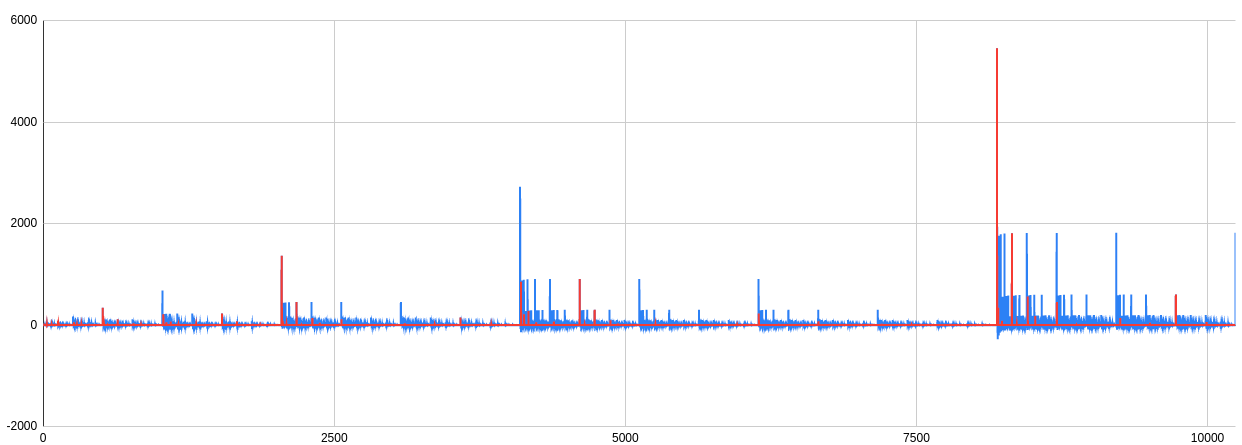

# Demonstrating that ...1,2,1,2... is the only possible cycle

The infinite ...■□■□... sequence can be expressed in matrix form as:
$\Large
    \begin{bmatrix}
        -3 &  2 \\
         2 & -1 \\
    \end{bmatrix}
    X
    =
    \begin{bmatrix}
        1 \\
        0 \\
    \end{bmatrix}$
    
And we easily find that the only solution is:
```
[ 1, 2 ]
```

It has been previously shown that every number is uniquely identified by its parity sequence, and moreover that if there are multiple Hailstone cycles, then their corresponding parity cycles must be different.

This makes it impossible to involve any larger number in a cycle that can be defined using this matrix approach and having more steps than 2.

Lagarias, Jeffrey C. (1985). "The 3x + 1 problem and its generalizations". The American Mathematical Monthly. 92 (1): 3–23. doi:10.1080/00029890.1985.11971528. JSTOR 2322189.

Terras, Riho (1976). "A stopping time problem on the positive integers" (PDF). Acta Arithmetica. 30 (3): 241–252. doi:10.4064/aa-30-3-241-252. MR 0568274.


# Why can't a starting number wander forever?  Why does large enough p eventually mean convergence?

### ? Because you can't keep generating odd numbers through a unique path without eventually generating an odd number that has residue 1

Need to work from the other end.

How do we show that the starting number for non-convergence is ∞ for ALL numbers rather than just for ...■■■■■... numbers?

# What happens to numbers that hit residue 1?


In [15]:
for i in range(9):
    x = 2**(i+1) + 1
    print("%8d: %s"%(x, collatzSeq(x)))
    

       3: [3, 5, 8, 4, 2, 1]
       5: [5, 8, 4, 2, 1]
       9: [9, 14, 7, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]
      17: [17, 26, 13, 20, 10, 5, 8, 4, 2, 1]
      33: [33, 50, 25, 38, 19, 29, 44, 22, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]
      65: [65, 98, 49, 74, 37, 56, 28, 14, 7, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]
     129: [129, 194, 97, 146, 73, 110, 55, 83, 125, 188, 94, 47, 71, 107, 161, 242, 121, 182, 91, 137, 206, 103, 155, 233, 350, 175, 263, 395, 593, 890, 445, 668, 334, 167, 251, 377, 566, 283, 425, 638, 319, 479, 719, 1079, 1619, 2429, 3644, 1822, 911, 1367, 2051, 3077, 4616, 2308, 1154, 577, 866, 433, 650, 325, 488, 244, 122, 61, 92, 46, 23, 35, 53, 80, 40, 20, 10, 5, 8, 4, 2, 1]
     257: [257, 386, 193, 290, 145, 218, 109, 164, 82, 41, 62, 31, 47, 71, 107, 161, 242, 121, 182, 91, 137, 206, 103, 155, 233, 350, 175, 263, 395, 593, 890, 445, 668, 334, 167, 251, 377, 566, 283, 425, 638, 319, 479, 719, 1079, 1619, 2429, 3644, 1822, 911, 1367, 2051, 3077, 4616, 2308,

In [16]:
def split(q, L_in):
    L_out = []
    for elem in L_in:
        L_out.append(elem)
        L_out.append(elem + 2**q)
    q = q + 1
    return q, L_out
#
def gen_partitions():
    L = [1]
    for p in range(1,8,1):
        q, L = split(p, L)
        print("%d   %s"%(q, L))
#
gen_partitions()

2   [1, 3]
3   [1, 5, 3, 7]
4   [1, 9, 5, 13, 3, 11, 7, 15]
5   [1, 17, 9, 25, 5, 21, 13, 29, 3, 19, 11, 27, 7, 23, 15, 31]
6   [1, 33, 17, 49, 9, 41, 25, 57, 5, 37, 21, 53, 13, 45, 29, 61, 3, 35, 19, 51, 11, 43, 27, 59, 7, 39, 23, 55, 15, 47, 31, 63]
7   [1, 65, 33, 97, 17, 81, 49, 113, 9, 73, 41, 105, 25, 89, 57, 121, 5, 69, 37, 101, 21, 85, 53, 117, 13, 77, 45, 109, 29, 93, 61, 125, 3, 67, 35, 99, 19, 83, 51, 115, 11, 75, 43, 107, 27, 91, 59, 123, 7, 71, 39, 103, 23, 87, 55, 119, 15, 79, 47, 111, 31, 95, 63, 127]
8   [1, 129, 65, 193, 33, 161, 97, 225, 17, 145, 81, 209, 49, 177, 113, 241, 9, 137, 73, 201, 41, 169, 105, 233, 25, 153, 89, 217, 57, 185, 121, 249, 5, 133, 69, 197, 37, 165, 101, 229, 21, 149, 85, 213, 53, 181, 117, 245, 13, 141, 77, 205, 45, 173, 109, 237, 29, 157, 93, 221, 61, 189, 125, 253, 3, 131, 67, 195, 35, 163, 99, 227, 19, 147, 83, 211, 51, 179, 115, 243, 11, 139, 75, 203, 43, 171, 107, 235, 27, 155, 91, 219, 59, 187, 123, 251, 7, 135, 71, 199, 39, 167, 103, 231,

In [17]:
def next_bits(p, L):
    B = []
    for elem in L:
        x = 2**p + elem
        for i in range(p-1):
            x = collatzNext(x)
        if x % 2 == 0:
            bit = 0
        else:
            bit = 1
        B.append(bit)
        
        if elem == 5:
            print("next bit for 5 is %d"%(bit))
    return B

def numFromBits(A):
    B = list(reversed(A))
    s = "".join(map(str, B))
    n = int(s, base=2)
    return n
#

def gen_partition_next_bit():
    L = [1]
    for p in range(1,8,1):
        q, L = split(p, L)
        print("%d   %s"%(q, L))
        B = next_bits(q, L)
        print("%d   %s"%(q, B))
        n = numFromBits(B)
        print("%d   %d"%(q,n))
#
gen_partition_next_bit()

2   [1, 3]
2   [0, 1]
2   2
3   [1, 5, 3, 7]
next bit for 5 is 0
3   [1, 0, 0, 1]
3   9
4   [1, 9, 5, 13, 3, 11, 7, 15]
next bit for 5 is 0
4   [0, 1, 0, 1, 0, 1, 0, 1]
4   170
5   [1, 17, 9, 25, 5, 21, 13, 29, 3, 19, 11, 27, 7, 23, 15, 31]
next bit for 5 is 1
5   [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]
5   39573
6   [1, 33, 17, 49, 9, 41, 25, 57, 5, 37, 21, 53, 13, 45, 29, 61, 3, 35, 19, 51, 11, 43, 27, 59, 7, 39, 23, 55, 15, 47, 31, 63]
next bit for 5 is 0
6   [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]
6   2858789542
7   [1, 65, 33, 97, 17, 81, 49, 113, 9, 73, 41, 105, 25, 89, 57, 121, 5, 69, 37, 101, 21, 85, 53, 117, 13, 77, 45, 109, 29, 93, 61, 125, 3, 67, 35, 99, 19, 83, 51, 115, 11, 75, 43, 107, 27, 91, 59, 123, 7, 71, 39, 103, 23, 87, 55, 119, 15, 79, 47, 111, 31, 95, 63, 127]
next bit for 5 is 1
7   [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 

In [18]:
A = np.array([
    [-3,2,0,0,0,0,0],
    [0,-1,2,0,0,0,0],
    [0,0,-1,2,0,0,0],
    [0,0,0,-1,2,0,0],
    [0,0,0,0,-3,2,0],
    [0,0,0,0,0,-1,2],
    [0,0,0,0,-1,0, 1],
])
b = np.array([1,0,0,0,1,0,0])
d = np.linalg.det(A)
A0 = A.copy()
A0.T[0] = b
d0 = np.linalg.det(A0)
(d0, d, d0/d)

(-15.0, -2.9999999999999996, 5.000000000000001)

In [19]:
A = np.array([
    [-3,2,0],
    [0,-1,2],
    [-1,0, 1],
])
b = np.array([1,0,0])
d = np.linalg.det(A)
A0 = A.copy()
A0.T[0] = b
d0 = np.linalg.det(A0)
(d0, d, d0/d)

(-1.0, -0.9999999999999998, 1.0000000000000002)

In [20]:
A = np.array([
    [-3,2,0,0,0],
    [0,-1,2,0,0],
    [0,0,-3,2,0],
    [0,0,0,-1,2],
    [0,0,1,0,-1],
])
b = np.array([1,0,1,0,0])
d = np.linalg.det(A)
A0 = A.copy()
A0.T[0] = b
d0 = np.linalg.det(A0)
(d0, d, d0/d)

(3.000000000000001, 2.9999999999999996, 1.0000000000000004)

In [21]:
A = np.array([
    [-3,2,0,0,0],
    [0,-3,2,0,0],
    [0,0,-3,2,0],
    [0,0,0,-1,2],
    [0,0,1,0,-1],
])
b = np.array([1,1,1,0,0])
d = np.linalg.det(A)
A0 = A.copy()
A0.T[0] = b
d0 = np.linalg.det(A0)
(d0, d, d0/d)

(-0.9999999999999987, 8.999999999999998, -0.11111111111111098)

In [22]:
A = np.array([
    [-3,2,0,0,0,0],
    [0,-3,2,0,0,0],
    [0,0,-1,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
b = np.array([1,1,0,1,0,0])
d = np.linalg.det(A)
A0 = A.copy()
A0.T[0] = b
d0 = np.linalg.det(A0)
(d0, d, d0/d)

(-2.9999999999999982, -8.999999999999998, 0.3333333333333332)

In [23]:
A = np.array([
    [-3,2,0,0,0,0],
    [0,-1,2,0,0,0],
    [0,0,-3,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
b = np.array([1,0,1,1,0,0])
d = np.linalg.det(A)
A0 = A.copy()
A0.T[0] = b
d0 = np.linalg.det(A0)
(d0, d, d0/d)

(-1.0000000000000027, -8.999999999999998, 0.11111111111111142)

In [24]:
A = np.array([
    [-3,2,0,0,0,0],
    [0,-1,2,0,0,0],
    [0,0,-1,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
b = np.array([1,0,0,1,0,0])
d = np.linalg.det(A)
A0 = A.copy()
A0.T[0] = b
d0 = np.linalg.det(A0)
(d0, d, d0/d)

(-7.000000000000001, -2.9999999999999996, 2.333333333333334)

In [25]:
def int2bits(i):
    bits = []
    while i != 0:
        bits.append(i & 1)
        i = i>>1
    return list(reversed(bits))
#
def genGeneratorMatrix(idx):
    bits = int2bits(idx)
    n = len(bits)
    M = np.zeros((n+3, n+3))
    C = np.zeros((n+3))
    # Set the parts of the Matrix that never change
    M[n][n], M[n][n+1],  C[n] = -3,2,   1
    M[n+1][n+1], M[n+1][n+2],  C[n+1] = -1,2,   0
    M[n+2][n], M[n+2][n+2],  C[n+2] =  1,-1,   0
    for i in range(len(bits)):
        pos = i
        M[pos][pos+1] = 2
        if bits[i] == 0:
            M[pos][pos], C[pos]  = -1, 0
        else:
            M[pos][pos], C[pos]  = -3, 1
    return M,C
    
def evalGenMatrixes(num):
    for i in range(num):
        M, C = genGeneratorMatrix(i)
        d = np.linalg.det(M)
        M.T[0] = C
        d0 = np.linalg.det(M)
        print("%d\t%f"%(i, d0/d))

In [26]:
evalGenMatrixes(10241)

0	1.000000
1	0.333333
2	1.000000
3	-0.111111
4	2.333333
5	0.111111
6	0.333333
7	-0.407407
8	5.000000
9	0.555556
10	1.000000
11	-0.481481
12	1.222222
13	-0.259259
14	-0.111111
15	-0.604938
16	10.333333
17	1.444444
18	2.333333
19	-0.629630
20	2.777778
21	-0.185185
22	0.111111
23	-0.876543
24	3.000000
25	0.037037
26	0.333333
27	-0.654321
28	0.481481
29	-0.506173
30	-0.407407
31	-0.736626
32	21.000000
33	3.222222
34	5.000000
35	-0.925926
36	5.888889
37	-0.037037
38	0.555556
39	-1.419753
40	6.333333
41	0.407407
42	1.000000
43	-0.975309
44	1.296296
45	-0.679012
46	-0.481481
47	-1.139918
48	6.555556
49	0.629630
50	1.222222
51	-0.753086
52	1.518519
53	-0.456790
54	-0.259259
55	-0.917695
56	1.666667
57	-0.308642
58	-0.111111
59	-0.769547
60	-0.012346
61	-0.670782
62	-0.604938
63	-0.824417
64	42.333333
65	6.777778
66	10.333333
67	-1.518519
68	12.111111
69	0.259259
70	1.444444
71	-2.506173
72	13.000000
73	1.148148
74	2.333333
75	-1.617284
76	2.925926
77	-1.024691
78	-0.629630
79	-1.946502
80	13.4

752	2.810700
753	-0.700960
754	-0.349794
755	-1.520348
756	-0.174211
757	-1.344765
758	-1.227709
759	-1.617894
760	-0.086420
761	-1.256973
762	-1.139918
763	-1.530102
764	-1.081390
765	-1.471574
766	-1.432556
767	-1.562617
768	113.222222
769	18.407407
770	27.888889
771	-3.716049
772	32.629630
773	1.024691
774	4.185185
775	-6.349794
776	35.000000
777	3.395062
778	6.555556
779	-3.979424
780	8.135802
781	-2.399177
782	-1.345679
783	-4.857339
784	36.185185
785	4.580247
786	7.740741
787	-2.794239
788	9.320988
789	-1.213992
790	-0.160494
791	-3.672154
792	10.111111
793	-0.423868
794	0.629630
795	-2.882030
796	1.156379
797	-2.355281
798	-2.004115
799	-3.174668
800	36.777778
801	5.172840
802	8.333333
803	-2.201646
804	9.913580
805	-0.621399
806	0.432099
807	-3.079561
808	10.703704
809	0.168724
810	1.222222
811	-2.289438
812	1.748971
813	-1.762689
814	-1.411523
815	-2.582076
816	11.098765
817	0.563786
818	1.617284
819	-1.894376
820	2.144033
821	-1.367627
822	-1.016461
823	-2.187014
824	2.407407

2024	-0.034294
2025	-0.814662
2026	-0.736626
2027	-0.996748
2028	-0.697607
2029	-0.957730
2030	-0.931718
2031	-1.018425
2032	-0.005030
2033	-0.785399
2034	-0.707362
2035	-0.967485
2036	-0.668343
2037	-0.928466
2038	-0.902454
2039	-0.989162
2040	-0.648834
2041	-0.908957
2042	-0.882945
2043	-0.969652
2044	-0.869939
2045	-0.956646
2046	-0.947975
2047	-0.976878
2048	1365.000000
2049	227.222222
2050	341.000000
2051	-38.259259
2052	397.888889
2053	18.629630
2054	56.555556
2055	-69.864198
2056	426.333333
2057	47.074074
2058	85.000000
2059	-41.419753
2060	103.962963
2061	-22.456790
2062	-9.814815
2063	-51.954733
2064	440.555556
2065	61.296296
2066	99.222222
2067	-27.197531
2068	118.185185
2069	-8.234568
2070	4.407407
2071	-37.732510
2072	127.666667
2073	1.246914
2074	13.888889
2075	-28.251029
2076	20.209877
2077	-21.930041
2078	-17.716049
2079	-31.762689
2080	447.666667
2081	68.407407
2082	106.333333
2083	-20.086420
2084	125.296296
2085	-1.123457
2086	11.518519
2087	-30.621399
2088	134.777778


2584	41.888889
2585	-0.251029
2586	3.962963
2587	-10.083676
2588	6.069959
2589	-7.976680
2590	-6.572016
2591	-11.254230
2592	148.555556
2593	22.135802
2594	34.777778
2595	-7.362140
2596	41.098765
2597	-1.041152
2598	3.172840
2599	-10.873800
2600	44.259259
2601	2.119342
2602	6.333333
2603	-7.713306
2604	8.440329
2605	-5.606310
2606	-4.201646
2607	-8.883859
2608	45.839506
2609	3.699588
2610	7.913580
2611	-6.133059
2612	10.020576
2613	-4.026063
2614	-2.621399
2615	-7.303612
2616	11.074074
2617	-2.972565
2618	-1.567901
2619	-6.250114
2620	-0.865569
2621	-5.547782
2622	-5.079561
2623	-6.640299
2624	149.740741
2625	23.320988
2626	35.962963
2627	-6.176955
2628	42.283951
2629	0.144033
2630	4.358025
2631	-9.688615
2632	45.444444
2633	3.304527
2634	7.518519
2635	-6.528121
2636	9.625514
2637	-4.421125
2638	-3.016461
2639	-7.698674
2640	47.024691
2641	4.884774
2642	9.098765
2643	-4.947874
2644	11.205761
2645	-2.840878
2646	-1.436214
2647	-6.118427
2648	12.259259
2649	-1.787380
2650	-0.382716
2651	

4214	-11.131687
4215	-20.496113
4216	16.259259
4217	-11.834019
4218	-9.024691
4219	-18.389118
4220	-7.620027
4221	-16.984454
4222	-16.048011
4223	-19.169486
4224	906.333333
4225	147.814815
4226	223.666667
4227	-29.172840
4228	261.592593
4229	8.753086
4230	34.037037
4231	-50.242798
4232	280.555556
4233	27.716049
4234	53.000000
4235	-31.279835
4236	65.641975
4237	-18.637860
4238	-10.209877
4239	-38.303155
4240	290.037037
4241	37.197531
4242	62.481481
4243	-21.798354
4244	75.123457
4245	-9.156379
4246	-0.728395
4247	-28.821674
4248	81.444444
4249	-2.835391
4250	5.592593
4251	-22.500686
4252	9.806584
4253	-18.286694
4254	-15.477366
4255	-24.841792
4256	294.777778
4257	41.938272
4258	67.222222
4259	-17.057613
4260	79.864198
4261	-4.415638
4262	4.012346
4263	-24.080933
4264	86.185185
4265	1.905350
4266	10.333333
4267	-17.759945
4268	14.547325
4269	-13.545953
4270	-10.736626
4271	-20.101052
4272	89.345679
4273	5.065844
4274	13.493827
4275	-14.599451
4276	17.707819
4277	-10.385460
4278	-7.5761

4808	28.407407
4809	0.314129
4810	3.123457
4811	-6.240969
4812	4.528121
4813	-4.836305
4814	-3.899863
4815	-7.021338
4816	29.460905
4817	1.367627
4818	4.176955
4819	-5.187471
4820	5.581619
4821	-3.782807
4822	-2.846365
4823	-5.967840
4824	6.283951
4825	-3.080476
4826	-2.144033
4827	-5.265508
4828	-1.675812
4829	-4.797287
4830	-4.485139
4831	-5.525631
4832	29.987654
4833	1.894376
4834	4.703704
4835	-4.660722
4836	6.108368
4837	-3.256059
4838	-2.319616
4839	-5.441091
4840	6.810700
4841	-2.553727
4842	-1.617284
4843	-4.738759
4844	-1.149063
4845	-4.270538
4846	-3.958390
4847	-4.998882
4848	7.161866
4849	-2.202561
4850	-1.266118
4851	-4.387593
4852	-0.797897
4853	-3.919372
4854	-3.607225
4855	-4.647716
4856	-0.563786
4857	-3.685261
4858	-3.373114
4859	-4.413606
4860	-3.217040
4861	-4.257532
4862	-4.153483
4863	-4.500313
4864	301.592593
4865	48.753086
4866	74.037037
4867	-10.242798
4868	86.679012
4869	2.399177
4870	10.827160
4871	-17.266118
4872	93.000000
4873	8.720165
4874	17.148148
4875	-

6280	93.074074
6281	8.794239
6282	17.222222
6283	-10.871056
6284	21.436214
6285	-6.657064
6286	-3.847737
6287	-13.212163
6288	96.234568
6289	11.954733
6290	20.382716
6291	-7.710562
6292	24.596708
6293	-3.496571
6294	-0.687243
6295	-10.051669
6296	26.703704
6297	-1.389575
6298	1.419753
6299	-7.944673
6300	2.824417
6301	-6.540009
6302	-5.603567
6303	-8.725042
6304	97.814815
6305	13.534979
6306	21.962963
6307	-6.130316
6308	26.176955
6309	-1.916324
6310	0.893004
6311	-8.471422
6312	28.283951
6313	0.190672
6314	3.000000
6315	-6.364426
6316	4.404664
6317	-4.959762
6318	-4.023320
6319	-7.144795
6320	29.337449
6321	1.244170
6322	4.053498
6323	-5.310928
6324	5.458162
6325	-3.906264
6326	-2.969822
6327	-6.091297
6328	6.160494
6329	-3.203932
6330	-2.267490
6331	-5.388965
6332	-1.799268
6333	-4.920744
6334	-4.608596
6335	-5.649088
6336	98.604938
6337	14.325103
6338	22.753086
6339	-5.340192
6340	26.967078
6341	-1.126200
6342	1.683128
6343	-7.681299
6344	29.074074
6345	0.980796
6346	3.790123
6347	-

6932	7.729767
6933	-1.634659
6934	-0.698217
6935	-3.819692
6936	8.432099
6937	-0.932327
6938	0.004115
6939	-3.117360
6940	0.472337
6941	-2.649139
6942	-2.336991
6943	-3.377483
6944	32.135802
6945	4.042524
6946	6.851852
6947	-2.512574
6948	8.256516
6949	-1.107910
6950	-0.171468
6951	-3.292943
6952	8.958848
6953	-0.405578
6954	0.530864
6955	-2.590611
6956	0.999086
6957	-2.122390
6958	-1.810242
6959	-2.850734
6960	9.310014
6961	-0.054412
6962	0.882030
6963	-2.239445
6964	1.350251
6965	-1.771224
6966	-1.459076
6967	-2.499568
6968	1.584362
6969	-1.537113
6970	-1.224966
6971	-2.265458
6972	-1.068892
6973	-2.109384
6974	-2.005335
6975	-2.352165
6976	32.399177
6977	4.305898
6978	7.115226
6979	-2.249200
6980	8.519890
6981	-0.844536
6982	0.091907
6983	-3.029569
6984	9.222222
6985	-0.142204
6986	0.794239
6987	-2.327237
6988	1.262460
6989	-1.859015
6990	-1.546868
6991	-2.587360
6992	9.573388
6993	0.208962
6994	1.145405
6995	-1.976071
6996	1.613626
6997	-1.507849
6998	-1.195702
6999	-2.236194
7000	

8320	1813.000000
8321	295.962963
8322	447.666667
8323	-58.012346
8324	523.518519
8325	17.839506
8326	68.407407
8327	-100.152263
8328	561.444444
8329	55.765432
8330	106.333333
8331	-62.226337
8332	131.617284
8333	-36.942387
8334	-20.086420
8335	-76.272977
8336	580.407407
8337	74.728395
8338	125.296296
8339	-43.263374
8340	150.580247
8341	-17.979424
8342	-1.123457
8343	-57.310014
8344	163.222222
8345	-5.337449
8346	11.518519
8347	-44.668038
8348	19.946502
8349	-36.240055
8350	-30.621399
8351	-49.350251
8352	589.888889
8353	84.209877
8354	134.777778
8355	-33.781893
8356	160.061728
8357	-8.497942
8358	8.358025
8359	-47.828532
8360	172.703704
8361	4.144033
8362	21.000000
8363	-35.186557
8364	29.427984
8365	-26.758573
8366	-21.139918
8367	-39.868770
8368	179.024691
8369	10.465021
8370	27.320988
8371	-28.865569
8372	35.748971
8373	-20.437586
8374	-14.818930
8375	-33.547782
8376	39.962963
8377	-16.223594
8378	-10.604938
8379	-29.333791
8380	-7.795610
8381	-26.524463
8382	-24.651578
8383	-30.89

8861	-14.080018
8862	-12.207133
8863	-18.450084
8864	194.629630
8865	26.069959
8866	42.925926
8867	-13.260631
8868	51.353909
8869	-4.832647
8870	0.786008
8871	-17.942844
8872	55.567901
8873	-0.618656
8874	5.000000
8875	-13.728852
8876	7.809328
8877	-10.919524
8878	-9.046639
8879	-15.289590
8880	57.674897
8881	1.488340
8882	7.106996
8883	-11.621856
8884	9.916324
8885	-8.812529
8886	-6.939643
8887	-13.182594
8888	11.320988
8889	-7.407865
8890	-5.534979
8891	-11.777930
8892	-4.598537
8893	-10.841488
8894	-10.217193
8895	-12.298176
8896	196.209877
8897	27.650206
8898	44.506173
8899	-11.680384
8900	52.934156
8901	-3.252401
8902	2.366255
8903	-16.362597
8904	57.148148
8905	0.961591
8906	6.580247
8907	-12.148605
8908	9.389575
8909	-9.339278
8910	-7.466392
8911	-13.709343
8912	59.255144
8913	3.068587
8914	8.687243
8915	-10.041610
8916	11.496571
8917	-7.232282
8918	-5.359396
8919	-11.602347
8920	12.901235
8921	-5.827618
8922	-3.954733
8923	-10.197683
8924	-3.018290
8925	-9.261241
8926	-8.636946

10156	-1.107606
10157	-3.188589
10158	-2.980491
10159	-3.674152
10160	4.433013
10161	-1.809938
10162	-1.185642
10163	-3.266626
10164	-0.873495
10165	-2.954478
10166	-2.746380
10167	-3.440041
10168	-0.717421
10169	-2.798405
10170	-2.590306
10171	-3.283968
10172	-2.486257
10173	-3.179918
10174	-3.110552
10175	-3.341773
10176	19.825789
10177	1.096936
10178	2.969822
10179	-3.273129
10180	3.906264
10181	-2.336686
10182	-1.712391
10183	-3.793375
10184	4.374486
10185	-1.868465
10186	-1.244170
10187	-3.325154
10188	-0.932023
10189	-3.013006
10190	-2.804908
10191	-3.498569
10192	4.608596
10193	-1.634355
10194	-1.010059
10195	-3.091043
10196	-0.697912
10197	-2.778895
10198	-2.570797
10199	-3.264458
10200	-0.541838
10201	-2.622822
10202	-2.414723
10203	-3.108385
10204	-2.310674
10205	-3.004335
10206	-2.934969
10207	-3.166190
10208	4.725652
10209	-1.517299
10210	-0.893004
10211	-2.973988
10212	-0.580857
10213	-2.661840
10214	-2.453742
10215	-3.147403
10216	-0.424783
10217	-2.505766
10218	-2.297668

In [27]:
def getSolutionPatterns():
    vals = [
        1,
        3,
        5,
        7,
        9,
        11,
        13,
        15,
        17,
        21,
        23,
        29,
        35,
        45,
        53,
        61,
        69,
        75,
        85,
        93,
        113,
        141,
        151,
        181,
        213,
        277,
        301,
        341,
        453,
        565,
        605,
        853,
        909,
        1365,
        1813,
        5461        
    ]
    for val in vals:
        print("%d\t%s"%(val, ''.join(list(blocks(collatzIter(val,22))))))
        
#
getSolutionPatterns()

1	⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑□
3	■■□□□⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑
5	■□□□⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑□
7	■■■□■□□■□□□⚑□⚑□⚑□⚑□⚑□⚑
9	■□■■■□■□□■□□□⚑□⚑□⚑□⚑□⚑
11	■■□■□□■□□□⚑□⚑□⚑□⚑□⚑□⚑□
13	■□□■□□□⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑
15	■■■■□□□□■□□□⚑□⚑□⚑□⚑□⚑□
17	■□■□□■□□□⚑□⚑□⚑□⚑□⚑□⚑□⚑
21	■□□□□□⚑□⚑□⚑□⚑□⚑□⚑□⚑□⚑□
23	■■■□□□□■□□□⚑□⚑□⚑□⚑□⚑□⚑
29	■□□■■□■□□■□□□⚑□⚑□⚑□⚑□⚑
35	■■□□□□■□□□⚑□⚑□⚑□⚑□⚑□⚑□
45	■□□■□■□□■□□□⚑□⚑□⚑□⚑□⚑□
53	■□□□□■□□□⚑□⚑□⚑□⚑□⚑□⚑□⚑
61	■□□■■■□□□□■□□□⚑□⚑□⚑□⚑□
69	■□□□■□□■□□□⚑□⚑□⚑□⚑□⚑□⚑
75	■■□■□□□□□□□⚑□⚑□⚑□⚑□⚑□⚑
85	■□□□□□□□⚑□⚑□⚑□⚑□⚑□⚑□⚑□
93	■□□■■□□□□■□□□⚑□⚑□⚑□⚑□⚑
113	■□■□□□□□□□⚑□⚑□⚑□⚑□⚑□⚑□
141	■□□■□□□□■□□□⚑□⚑□⚑□⚑□⚑□
151	■■■□□□□□□□□□⚑□⚑□⚑□⚑□⚑□
181	■□□□□■□■□□■□□□⚑□⚑□⚑□⚑□
213	■□□□□□□■□□□⚑□⚑□⚑□⚑□⚑□⚑
277	■□□□□□■□□■□□□⚑□⚑□⚑□⚑□⚑
301	■□□■□■□□□□□□□⚑□⚑□⚑□⚑□⚑
341	■□□□□□□□□□⚑□⚑□⚑□⚑□⚑□⚑□
453	■□□□■□□□□□□□⚑□⚑□⚑□⚑□⚑□
565	■□□□□■□□□□■□□□⚑□⚑□⚑□⚑□
605	■□□■■□□□□□□□□□⚑□⚑□⚑□⚑□
853	■□□□□□□□□■□□□⚑□⚑□⚑□⚑□⚑
909	■□□■□□□□□□□□□⚑□⚑□⚑□⚑□⚑
1365	■□□□□□□□□□□□⚑□⚑□⚑□⚑□⚑□
1813	■□□□□□■□□□□□□□⚑□⚑□⚑□⚑□
5461	■□□□□□□□□□□□□□⚑□⚑□⚑□⚑□


In [28]:
''.join(list(blocks(collatzIter(19,22))))

'■■□□■■□■□□■□□□⚑□⚑□⚑□⚑□'

In [29]:
''.join(list(blocks(collatzIter(25,22))))

'■□■■□□■■□■□□■□□□⚑□⚑□⚑□'

In [30]:
''.join(list(blocks(collatzIter(27,80))))

'■■□■■■■■□■□■■□■■■□■■■■□■□□■■■□■■□■■■■■■□□■■■■□□□■□■□■□□□■□□■■■□□□□■□□□⚑□⚑□⚑□⚑□⚑□'

# TODO
Make the matrix generator run to a given matrix size instead of N
Need to prove we pick up a new solution with each new partitioning starting at p=5 which gives us 5

N.M.  This would prove infinite integer solutions, not all odd integer solutions.

GENERATE THE PARTITION Tree ... can this be done heuristically independently of Collatz?

Then we know there is some "p" that will give a solution for every odd integer.  

Note that non-1 solutions start with p=5 => 2^5 + 5 => 5

We also know p > log_2(c) + 1

In [31]:
A = np.array([
    [-3,2,0,0,0,0,0],
    [0,-1,2,0,0,0,0],
    [0,0,-1,2,0,0,0],
    [0,0,0,-1,2,0,0],
    [0,0,0,0,-3,2,0],
    [0,0,0,0,0,-1,2],
    [0,0,0,0,-1,0, 1],
])
C = np.array([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]).T
np.linalg.solve(A, C)

array([5., 8., 4., 2., 1., 2., 1.])

In [32]:
A = np.array([
    [-3,2,0,0,0],
    [0,-1,2,0,0],
    [0,0,-3,2,0],
    [0,0,0,-1,2],
    [0,0,1,0,-1],
])
C = np.array([1.0, 0.0, 1.0, 0.0, 0.0]).T
np.linalg.solve(A, C)

array([1., 2., 1., 2., 1.])

In [33]:
A = np.array([
    [-1,2,0,0],
    [0,-3,2,0],
    [0,0,-1,2],
    [0,1,0,-1],
])
C = np.array([0.0, 1.0, 0.0, 0.0]).T
np.linalg.solve(A, C)

array([2., 1., 2., 1.])

# Matrix Sequences

## Rank 3

In [34]:
XX = []
A = np.array([
    [-3,2,0],
    [0,-1,2],
    [1,0,-1],
])
C = np.array([1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))
XX

[array([1., 2., 1.])]

## Rank 4

In [35]:
XX = []
A = np.array([
    [-1,2,0,0],
    [0,-3,2,0],
    [0,0,-1,2],
    [0,1,0,-1],
])
C = np.array([0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

A = np.array([
    [-3,2,0,0],
    [0,-3,2,0],
    [0,0,-1,2],
    [0,1,0,-1],
])
C = np.array([1.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

XX

[array([2., 1., 2., 1.]),
 array([0.33333333, 1.        , 2.        , 1.        ])]

## Rank 5

In [36]:
XX = []
A = np.array([
    [-1,2,0,0,0],
    [0,-1,2,0,0],
    [0,0,-3,2,0],
    [0,0,0,-1,2],
    [0,0,1,0,-1],
])
C = np.array([0.0, 0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

A = np.array([
    [-3,2,0,0,0],
    [0,-1,2,0,0],
    [0,0,-3,2,0],
    [0,0,0,-1,2],
    [0,0,1,0,-1],
])
C = np.array([1.0, 0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))


A = np.array([
    [-1,2,0,0,0],
    [0,-3,2,0,0],
    [0,0,-3,2,0],
    [0,0,0,-1,2],
    [0,0,1,0,-1],
])
C = np.array([0.0, 0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

A = np.array([
    [-3,2,0,0,0],
    [0,-3,2,0,0],
    [0,0,-3,2,0],
    [0,0,0,-1,2],
    [0,0,1,0,-1],
])
C = np.array([1.0, 1.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

XX

[array([4., 2., 1., 2., 1.]),
 array([1., 2., 1., 2., 1.]),
 array([1.33333333, 0.66666667, 1.        , 2.        , 1.        ]),
 array([-0.11111111,  0.33333333,  1.        ,  2.        ,  1.        ])]

## Rank 6

In [37]:
XX = []
A = np.array([
    [-1,2,0,0,0,0],
    [0,-1,2,0,0,0],
    [0,0,-1,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
C = np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

A = np.array([
    [-3,2,0,0,0,0],
    [0,-1,2,0,0,0],
    [0,0,-1,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
C = np.array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))





A = np.array([
    [-1,2,0,0,0,0],
    [0,-3,2,0,0,0],
    [0,0,-1,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
C = np.array([0.0, 1.0, 0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

A = np.array([
    [-3,2,0,0,0,0],
    [0,-3,2,0,0,0],
    [0,0,-1,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
C = np.array([1.0, 1.0, 0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))





A = np.array([
    [-1,2,0,0,0,0],
    [0,-1,2,0,0,0],
    [0,0,-3,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
C = np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

A = np.array([
    [-3,2,0,0,0,0],
    [0,-1,2,0,0,0],
    [0,0,-3,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
C = np.array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))



A = np.array([
    [-1,2,0,0,0,0],
    [0,-3,2,0,0,0],
    [0,0,-3,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
C = np.array([0.0, 1.0, 1.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

A = np.array([
    [-3,2,0,0,0,0],
    [0,-3,2,0,0,0],
    [0,0,-3,2,0,0],
    [0,0,0,-3,2,0],
    [0,0,0,0,-1,2],
    [0,0,0,1,0,-1],
])
C = np.array([1.0, 1.0, 1.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))



XX

[array([8., 4., 2., 1., 2., 1.]),
 array([2.33333333, 4.        , 2.        , 1.        , 2.        ,
        1.        ]),
 array([2., 1., 2., 1., 2., 1.]),
 array([0.33333333, 1.        , 2.        , 1.        , 2.        ,
        1.        ]),
 array([2.66666667, 1.33333333, 0.66666667, 1.        , 2.        ,
        1.        ]),
 array([0.55555556, 1.33333333, 0.66666667, 1.        , 2.        ,
        1.        ]),
 array([-0.22222222, -0.11111111,  0.33333333,  1.        ,  2.        ,
         1.        ]),
 array([-0.40740741, -0.11111111,  0.33333333,  1.        ,  2.        ,
         1.        ])]

## Rank N

In [38]:
def extend_even(tup):
    rank = len(tup[1]) + 1
    M = np.zeros((rank,rank))
    C = np.zeros((rank))
    M[1:,1:] = tup[0]
    M[0][0] = -1.0
    M[0][1] = 2.0
    C[1:] = tup[1]
    C[0] = 0.0
    return (M,C)
#
extend_even(
    extend_even((
            np.array([
                [-3,2,0],
                [0,-1,2],
                [1,0,-1]]),
            np.array([1.0, 0.0, 0.0]).T
        )
    )
)

(array([[-1.,  2.,  0.,  0.,  0.],
        [ 0., -1.,  2.,  0.,  0.],
        [ 0.,  0., -3.,  2.,  0.],
        [ 0.,  0.,  0., -1.,  2.],
        [ 0.,  0.,  1.,  0., -1.]]),
 array([0., 0., 1., 0., 0.]))

In [39]:
def extend_odd(tup):
    rank = len(tup[1]) + 1
    M = np.zeros((rank,rank))
    C = np.zeros((rank))
    M[1:,1:] = tup[0]
    M[0][0] = -3.0
    M[0][1] = 2.0
    C[1:] = tup[1]
    C[0] = 1.0
    return (M,C)
#
extend_odd(
    extend_odd((
            np.array([
                [-3,2,0],
                [0,-1,2],
                [1,0,-1]]),
            np.array([1.0, 0.0, 0.0]).T
        )
    )
)

(array([[-3.,  2.,  0.,  0.,  0.],
        [ 0., -3.,  2.,  0.,  0.],
        [ 0.,  0., -3.,  2.,  0.],
        [ 0.,  0.,  0., -1.,  2.],
        [ 0.,  0.,  1.,  0., -1.]]),
 array([1., 1., 1., 0., 0.]))

In [40]:
def RankMatrixGenerator(max_rank):
    previous = [ (
        np.array([
            [-3,2,0],
            [0,-1,2],
            [1,0,-1],
        ]),
        np.array([1.0, 0.0, 0.0]).T
    ) ]
    
    for rank in range(3, max_rank+1):
        if rank == 3:
            yield  [(   
                    rank, 
                    np.linalg.solve(*(previous[0])),
                    ( np.array([
                        [-3,2,0],
                        [0,-1,2],
                        [1,0,-1],
                      ]),
                      np.array([1.0, 0.0, 0.0]).T )
                )]
        else:
            current = []
            XX = []
            for tup in previous:
                current.append(extend_even(tup))
                current.append(extend_odd(tup))
            for tup in current:
                XX.append( (rank, np.linalg.solve(*(tup)), tup) )
            yield XX
            previous = current
#

list(RankMatrixGenerator(10))
         

[[(3,
   array([1., 2., 1.]),
   (array([[-3,  2,  0],
           [ 0, -1,  2],
           [ 1,  0, -1]]),
    array([1., 0., 0.])))],
 [(4,
   array([2., 1., 2., 1.]),
   (array([[-1.,  2.,  0.,  0.],
           [ 0., -3.,  2.,  0.],
           [ 0.,  0., -1.,  2.],
           [ 0.,  1.,  0., -1.]]),
    array([0., 1., 0., 0.]))),
  (4,
   array([0.33333333, 1.        , 2.        , 1.        ]),
   (array([[-3.,  2.,  0.,  0.],
           [ 0., -3.,  2.,  0.],
           [ 0.,  0., -1.,  2.],
           [ 0.,  1.,  0., -1.]]),
    array([1., 1., 0., 0.])))],
 [(5,
   array([4., 2., 1., 2., 1.]),
   (array([[-1.,  2.,  0.,  0.,  0.],
           [ 0., -1.,  2.,  0.,  0.],
           [ 0.,  0., -3.,  2.,  0.],
           [ 0.,  0.,  0., -1.,  2.],
           [ 0.,  0.,  1.,  0., -1.]]),
    array([0., 0., 1., 0., 0.]))),
  (5,
   array([1., 2., 1., 2., 1.]),
   (array([[-3.,  2.,  0.,  0.,  0.],
           [ 0., -1.,  2.,  0.,  0.],
           [ 0.,  0., -3.,  2.,  0.],
           [ 0., 

In [41]:
for l in RankMatrixGenerator(10):
    print('\t'.join(map(str, l)))

(3, array([1., 2., 1.]), (array([[-3,  2,  0],
       [ 0, -1,  2],
       [ 1,  0, -1]]), array([1., 0., 0.])))
(4, array([2., 1., 2., 1.]), (array([[-1.,  2.,  0.,  0.],
       [ 0., -3.,  2.,  0.],
       [ 0.,  0., -1.,  2.],
       [ 0.,  1.,  0., -1.]]), array([0., 1., 0., 0.])))	(4, array([0.33333333, 1.        , 2.        , 1.        ]), (array([[-3.,  2.,  0.,  0.],
       [ 0., -3.,  2.,  0.],
       [ 0.,  0., -1.,  2.],
       [ 0.,  1.,  0., -1.]]), array([1., 1., 0., 0.])))
(5, array([4., 2., 1., 2., 1.]), (array([[-1.,  2.,  0.,  0.,  0.],
       [ 0., -1.,  2.,  0.,  0.],
       [ 0.,  0., -3.,  2.,  0.],
       [ 0.,  0.,  0., -1.,  2.],
       [ 0.,  0.,  1.,  0., -1.]]), array([0., 0., 1., 0., 0.])))	(5, array([1., 2., 1., 2., 1.]), (array([[-3.,  2.,  0.,  0.,  0.],
       [ 0., -1.,  2.,  0.,  0.],
       [ 0.,  0., -3.,  2.,  0.],
       [ 0.,  0.,  0., -1.,  2.],
       [ 0.,  0.,  1.,  0., -1.]]), array([1., 0., 1., 0., 0.])))	(5, array([0.66666667, 0.33333333, 

(10, array([128.,  64.,  32.,  16.,   8.,   4.,   2.,   1.,   2.,   1.]), (array([[-1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.]]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])))	(10, array([42.33333333, 64.        , 32.        , 16.        ,  8.        ,
        4.        ,  2.        ,  1.        ,  2.        ,  1.        ]), (array([[-3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 

In [42]:
def generationGen(gen_list):
    next_list = []
    for i in gen_list:
        next_list.append(2*i)
    for j in next_list:
        if (j-1) % 3 == 0:
            odd = (j-1) // 3
            if odd > 1 and odd % 2 == 1:
                next_list.append(odd)
    return sorted(next_list, reverse=True)

def gen_gens(num_gen):
    gen_list = [1]
    for i in range(num_gen-1):
        if i == 0:
            print("Generation %d:"%(i+1))
            print("%s"%(gen_list))
        gen_list = generationGen(gen_list)
        print("Generation %d:"%(i+2))
        print("%s"%(gen_list))
        
gen_gens(20)

Generation 1:
[1]
Generation 2:
[2]
Generation 3:
[4]
Generation 4:
[8]
Generation 5:
[16, 5]
Generation 6:
[32, 10, 3]
Generation 7:
[64, 21, 20, 6]
Generation 8:
[128, 42, 40, 13, 12]
Generation 9:
[256, 85, 84, 80, 26, 24]
Generation 10:
[512, 170, 168, 160, 53, 52, 48, 17]
Generation 11:
[1024, 341, 340, 336, 320, 113, 106, 104, 96, 35, 34, 11]
Generation 12:
[2048, 682, 680, 672, 640, 227, 226, 213, 212, 208, 192, 75, 70, 69, 68, 23, 22, 7]
Generation 13:
[4096, 1365, 1364, 1360, 1344, 1280, 454, 453, 452, 426, 424, 416, 384, 151, 150, 141, 140, 138, 136, 46, 45, 44, 15, 14]
Generation 14:
[8192, 2730, 2728, 2720, 2688, 2560, 909, 908, 906, 904, 853, 852, 848, 832, 768, 302, 301, 300, 282, 280, 277, 276, 272, 93, 92, 90, 88, 30, 29, 28, 9]
Generation 15:
[16384, 5461, 5460, 5456, 5440, 5376, 5120, 1818, 1816, 1813, 1812, 1808, 1706, 1704, 1696, 1664, 1536, 605, 604, 602, 600, 565, 564, 560, 554, 552, 544, 201, 186, 184, 181, 180, 176, 61, 60, 58, 56, 19, 18]
Generation 16:
[32768,

# Combined Matrix Sequences

## Rank 3 + Rank 4

In [43]:
"""
XX = []
A = np.array([
    [-3,2,0],
    [0,-1,2],
    [1,0,-1],
])
C = np.array([1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))
XX

XX = []
A = np.array([
    [-1,2,0,0],
    [0,-3,2,0],
    [0,0,-1,2],
    [0,1,0,-1],
])
C = np.array([0.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

A = np.array([
    [-3,2,0,0],
    [0,-3,2,0],
    [0,0,-1,2],
    [0,1,0,-1],
])
C = np.array([1.0, 1.0, 0.0, 0.0]).T
XX.append(np.linalg.solve(A, C))

XX
"""
XX = []
A = np.array([
    [-1,2,0,0,0,0],
    [0,-3,2,0,0,0],
    [0,0,-1,2,0,0],
    [0,1,0,-2,0,1],
    [0,0,0,2,-1,0],
    [0,0,0,0,2,-3]
])
C = np.array([0.0, 1.0, 0.0, 0.0, 0.0,1.0]).T
XX.append(np.linalg.solve(A, C))

A = np.array([
    [-3,2,0,0,0,0],
    [0,-3,2,0,0,0],
    [0,0,-1,2,0,0],
    [0,1,0,-2,0,1],
    [0,0,0,2,-1,0],
    [0,0,0,0,2,-3]
])
C = np.array([1.0, 1.0, 0.0, 0.0, 0.0,1.0]).T
XX.append(np.linalg.solve(A, C))

XX


[array([2., 1., 2., 1., 2., 1.]),
 array([0.33333333, 1.        , 2.        , 1.        , 2.        ,
        1.        ])]

In [44]:
np.linalg.solve(*(
    np.array([
        [-3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -3.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -3.]
    ]),
    np.array([1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1])
))

array([ 3.,  5.,  8.,  4.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  4.,
        8., 16., 32., 21.])

In [45]:
np.linalg.solve(*(
    np.array([
        [-3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0., -3.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -3.]
    ]),
    np.array([1,1,0,0,0,1,0,0,1,0,0,0,0,0,1])
))

array([ 3.,  5.,  8.,  4.,  2.,  1.,  2.,  1.,  1.,  2.,  4.,  8., 16.,
       32., 21.])

In [46]:
# My new core matrix is:

np.linalg.solve(*(
    np.array([
        [-3.,  2.,  0.,  0.],
        [ 0., -1.,  2.,  0.],
        [ 1.,  0., -1.,  0.],
        [ 0.,  2.,  0., -3.]
    ]),
    np.array([1,0,0,1])
))
        

array([1., 2., 1., 1.])

# Rank N Combined

In [47]:
def comb_extend_even(tup):
    rank = len(tup[1]) + 2
    M = np.zeros((rank,rank))
    C = np.zeros((rank))
    
    # copy the middles
    M[1:rank-1,1:rank-1] = tup[0]
    C[1:rank-1] = tup[1]
    
    # fill in top row
    M[0][0], M[0][1] = -1.0, 2.0
    C[0] = 0.0
    
    # fill in the bottome row
    M[rank-1][rank-2], M[rank-1][rank-1] = 2.0, -1.0
    C[rank-1] = 0.0
    
    
    return (M,C)
#
comb_extend_even(
    comb_extend_even(
        ( np.array([
                [-3.,  2.,  0.,  0.],
                [ 0., -1.,  2.,  0.],
                [ 1.,  0., -1.,  0.],
                [ 0.,  2.,  0., -3.]
            ]),
            np.array([1,0,0,1]) )
    )
)

(array([[-1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -3.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  0., -3.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  2., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  2., -1.]]),
 array([0., 0., 1., 0., 0., 1., 0., 0.]))

In [48]:
def comb_extend_odd(tup):
    rank = len(tup[1]) + 2
    M = np.zeros((rank,rank))
    C = np.zeros((rank))
    
    # copy the middles
    M[1:rank-1,1:rank-1] = tup[0]
    C[1:rank-1] = tup[1]
    
    # fill in top row
    M[0][0], M[0][1] = -3.0, 2.0
    C[0] = 1.0
    
    # fill in the bottome row
    M[rank-1][rank-2], M[rank-1][rank-1] = 2.0, -3.0
    C[rank-1] = 1.0
    
    
    return (M,C)
#
comb_extend_odd(
    comb_extend_odd((
            np.array([
                [-3.,  2.,  0.,  0.],
                [ 0., -1.,  2.,  0.],
                [ 1.,  0., -1.,  0.],
                [ 0.,  2.,  0., -3.]
            ]),
            np.array([1,0,0,1])
        )
    )
)

(array([[-3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -3.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -3.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  0., -3.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  2., -3.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  2., -3.]]),
 array([1., 1., 1., 0., 0., 1., 1., 1.]))

In [49]:
def CombinedRankMatrixGenerator(max_rank):
    previous = [ 
            ( np.array([
                [-3.,  2.,  0.,  0.,  0.],
                [ 0., -1.,  2.,  0.,  0.],
                [ 1.,  0., -1.,  0.,  0.],
                [ 0.,  2.,  0., -3.,  0.],
                [ 0.,  0.,  0.,  2., -1.],
            ]),
            np.array([1,0,0,1,0]) ),
            ( np.array([
                [-3.,  2.,  0.,  0.,  0.],
                [ 0., -1.,  2.,  0.,  0.],
                [ 1.,  0., -1.,  0.,  0.],
                [ 0.,  2.,  0., -3.,  0.],
                [ 0.,  0.,  0.,  2., -3.],
            ]),
            np.array([1,0,0,1,1]) ),
    ]
    
    for rank in range(4, max_rank+1, 2):
        if rank == 4:
            XX = []
            for tup in previous:
                XX.append(np.linalg.solve(*(tup)))
            yield XX
        else:
            current = []
            XX = []
            for tup in previous:
                current.append(comb_extend_even(tup))
                current.append(comb_extend_odd(tup))
            for tup in current:
                XX.append(np.linalg.solve(*(tup)))
            yield XX
            previous = current
#




In [50]:
EPSILON = 0.0000001
def maybe_int(val):
    if val - math.floor(val + EPSILON) < EPSILON:
        return True, int(math.floor(val + EPSILON))
    else:
        return False, val

for soln_set in CombinedRankMatrixGenerator(19):
    for soln in soln_set:
        is_int, val = maybe_int(soln[0])
        if is_int:
            print(val)
        is_int, val = maybe_int(soln[-1])
        if is_int:
            print(val)        

1
2
1
2
4
1
2
4
8
1
2
4
1
8
16
5
2
4
1
8
2
16
32
5
10
3
4
1
8
2
16
5
4
1
32
64
21
10
3
20
6
8
2
16
5
4
1
32
10
3
8
2
64
128
21
42
20
6
40
13
12
16
5
4
1
32
10
3
8
2
64
21
20
6
16
5
4
1
128
256
85
42
84
40
13
12
80
26
24
32
10
3
8
2
64
21
20
6
16
5
4
1
128
42
40
13
12
32
10
3
8
2


In [55]:
def get_distinct_odds(max_rank):
    soln_count = 0
    S = set([])
    for soln_set in CombinedRankMatrixGenerator(max_rank):
        for soln in soln_set:
            soln_count = soln_count + 1
            is_int, val = maybe_int(soln[0])
            if is_int and ( (val % 2) == 1):
                S.add(val)
            is_int, val = maybe_int(soln[-1])
            if is_int and ( (val % 2) == 1):
                S.add(val)
    print("Found %d odd integers solving %d linear equations up to rank %d"%(len(S), soln_count, max_rank))
    print(sorted(list(S)))
    
#    
get_distinct_odds(25)


Found 18 odd integers solving 4094 linear equations up to rank 25
[1, 3, 5, 7, 11, 13, 17, 21, 23, 35, 53, 69, 75, 85, 113, 213, 227, 341]


# Some Solution Counts

Found 8 odd integers solving 1022 linear equations up to rank 21
  - ⟦1, 3, 5, 13, 17, 21, 53, 85⟧
  - First missing odd: 7
  - Connected: 3

Found 18 odd integers solving 4094 linear equations up to rank 25
  - ⟦1, 3, 5, 7, 11, 13, 17, 21, 23, 35, 53, 69, 75, 85, 113, 213, 227, 341⟧
  - First missing odd: 15
  - Connected: 4

Found 39 odd integers solving 32766 linear equations up to rank 31
  - ⟦1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 29, 35, 45, 53, 61, 69, 75, 85, 93, 113, 141, 151, 181, 201, 213, 227, 277, 301, 341, 453, 565, 605, 853, 909, 1365, 1813, 5461⟧
  - First missing odd: 25
  - Connected: 12

Found 91 odd integers solving 262142 linear equations up to rank 37
  - ⟦1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 29, 35, 37, 45, 49, 51, 53, 61, 69, 75, 77, 81, 85, 93, 113, 117, 141, 149, 151, 163, 181, 201, 213, 227, 241, 245, 267, 277, 301, 341, 369, 373, 401, 403, 453, 469, 483, 497, 535, 537, 565, 605, 725, 739, 753, 803, 805, 853, 909, 1109, 1137, 1205, 1365, 1477, 1493, 1507, 1605, 1611, 1613, 1813, 2261, 2275, 2417, 2421, 3413, 3637, 4437, 4549, 4821, 4835, 4849, 5461, 7253, 7281, 13653, 14549, 14563, 21845⟧
  - First missing odd: 27
  - Connected: 13

Found 120 odd integers solving 524286 linear equations up to rank 39
  - ⟦1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 29, 33, 35, 37, 45, 49, 51, 53, 61, 69, 75, 77, 81, 85, 93, 99, 101, 113, 117, 141, 149, 151, 163, 181, 201, 213, 227, 241, 245, 267, 277, 301, 309, 321, 325, 331, 341, 369, 373, 401, 403, 453, 469, 483, 497, 535, 537, 565, 605, 725, 739, 753, 803, 805, 853, 909, 965, 981, 985, 995, 1069, 1073, 1075, 1109, 1137, 1205, 1365, 1477, 1493, 1507, 1605, 1611, 1613, 1813, 2261, 2275, 2417, 2421, 2901, 2957, 3013, 3033, 3213, 3221, 3223, 3413, 3637, 4437, 4549, 4821, 4835, 4849, 5461, 7253, 7281, 9045, 9101, 9669, 9685, 9699, 13653, 14549, 14563, 21845, 29013, 29125, 87381⟧
  - First missing odd:  27
  - Connected: 13



In [61]:
math.log(7, 2)/21

0.13368356771702877

In [62]:
math.log(18, 2)/25

0.1667970000576925

In [63]:
math.log(39, 2)/31

0.17049684576974997

In [64]:
math.log(91, 2)/37

0.1758863416269918

In [65]:
math.log(120, 2)/39

0.17709975886175688

In [66]:
2**0.196

1.145517897979757

In [67]:
2**(-0.757)


0.5917255108762856

In [74]:
def odd_count_for_rank(rank):
    return 0.5917 * (math.pow(1.146, rank))

def rank_for_odd_count(odd_count):
    return math.log(odd_count/0.592)/math.log(1.146)

odd_count_for_rank(39) , rank_for_odd_count(120)

(120.30998063784435, 38.97734971767294)

In [75]:
rank_for_odd_count(1000)

54.53576321774243

In [3]:
b = np.array([0,1,2])
b.T

array([0, 1, 2])

In [4]:
b

array([0, 1, 2])